In [133]:
#importing all the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt     
import seaborn as sns  
from datetime import datetime 

In [134]:
#change the location if needed in future(this is my computer's path) 
dt = pd.read_csv("C:/Users/viswa/OneDrive/Desktop/assesment_thinkclock/metadata.csv")

In [135]:
#checking the data after reading
dt.head()

type                                         start_time  \
0  discharge  [2010.       7.      21.      15.       0.    ...   
1  impedance  [2010.       7.      21.      16.      53.    ...   
2     charge  [2010.       7.      21.      17.      25.    ...   
3  impedance                    [2010    7   21   20   31    5]   
4  discharge  [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...   

   ambient_temperature battery_id  test_id  uid   filename  \
0                    4      B0047        0    1  00001.csv   
1                   24      B0047        1    2  00002.csv   
2                    4      B0047        2    3  00003.csv   
3                   24      B0047        3    4  00004.csv   
4                    4      B0047        4    5  00005.csv   

             Capacity                   Re                  Rct  
0  1.6743047446975208                  NaN                  NaN  
1                 NaN  0.05605783343888099  0.20097016584458333  
2                 NaN                  NaN                  NaN  
3                 NaN  0.05319185850921101  0.16473399914864734  
4  1.5243662105099023                  NaN                  NaN

In [136]:
#start_time column format has to be changed
dt.start_time

0       [2010.       7.      21.      15.       0.    ...
1       [2010.       7.      21.      16.      53.    ...
2       [2010.       7.      21.      17.      25.    ...
3                         [2010    7   21   20   31    5]
4       [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...
                              ...                        
7560    [2010.       9.      30.       7.      36.    ...
7561    [2010.       9.      30.       8.       8.    ...
7562    [2010.      9.     30.      8.     48.     54.25]
7563    [2010.       9.      30.      11.      50.    ...
7564    [2010.       9.      30.      12.      31.    ...
Name: start_time, Length: 7565, dtype: object

In [137]:
#reseting index to 0,1,2...
dt = data.reset_index(drop=True)

In [138]:
#formating start_time using regular exp
import re
#cleaning the dataset
def convert_start_time(value):
        # Remove square brackets and split the values
        value = re.sub(r"[^\d.eE+-]", " ", value).split()
        # Convert all data points to float values
        value = [float(v) for v in value]  
        # First three values are year, month, day 
        year, month, day = map(int, value[:3])  
        # Next two values are hour, minute
        hour, minute = map(int, value[3:5])    
        # at last the Seconds
        second = float(value[5])             
        
        return datetime(year, month, day, hour, minute, int(second))

def format_start_time(dt, col):
    dt[col] = dt[col].apply(convert_start_time)
    return dt

dt = pd.DataFrame(data)
dt = format_start_time(dt, "start_time")
print(dt)


           type          start_time  ambient_temperature battery_id  test_id  \
0     discharge 2010-07-21 15:00:35                    4      B0047        0   
1     impedance 2010-07-21 16:53:45                   24      B0047        1   
2        charge 2010-07-21 17:25:40                    4      B0047        2   
3     impedance 2010-07-21 20:31:05                   24      B0047        3   
4     discharge 2010-07-21 21:02:56                    4      B0047        4   
...         ...                 ...                  ...        ...      ...   
7560  impedance 2010-09-30 07:36:45                   24      B0055      247   
7561  discharge 2010-09-30 08:08:36                    4      B0055      248   
7562     charge 2010-09-30 08:48:54                    4      B0055      249   
7563  discharge 2010-09-30 11:50:17                    4      B0055      250   
7564     charge 2010-09-30 12:31:10                    4      B0055      251   

       uid   filename            Capaci

In [139]:
#checking the applied format
dt.start_time

0      2010-07-21 15:00:35
1      2010-07-21 16:53:45
2      2010-07-21 17:25:40
3      2010-07-21 20:31:05
4      2010-07-21 21:02:56
               ...        
7560   2010-09-30 07:36:45
7561   2010-09-30 08:08:36
7562   2010-09-30 08:48:54
7563   2010-09-30 11:50:17
7564   2010-09-30 12:31:10
Name: start_time, Length: 7565, dtype: datetime64[ns]

In [140]:
#replacing empty rows with nan
dt.loc[dt["Capacity"]=="[]", "Capacity"] = np.nan
dt[dt["Capacity"]=="[]"]["Capacity"]

Series([], Name: Capacity, dtype: object)

In [141]:
#in NASA Battery Dataset kaggle page extra info of these were given to determine the diffrent variations of battery.
grouping  =     {"B1": ["B0025", "B0026", "B0027", "B0028"],
                "B2": ["B0029", "B0030", "B0031", "B0032"],
                "B3": ["B0033", "B0034", "B0036"],
                "B4": ["B0038", "B0039", "B0040"],
                "B5": ["B0041", "B0042", "B0043", "B0044"],
                "B6": ["B0045", "B0046", "B0047", "B0048"],
                "B7": ["B0049", "B0050", "B0051", "B0052"],
                "B8": ["B0053", "B0054", "B0055", "B0056"],
                "B9": ["B0005", "B0006", "B0007", "B0018"]}

In [142]:
#assigning battery_groups according to the value - battery id
#reverse grouping because I am assigning key to the values in the data
reverse_grouping = {value: key for key, values in grouping.items() for value in values}
dt["battery_group"] = dt["battery_id"].map(reverse_grouping)
dt

type          start_time  ambient_temperature battery_id  test_id  \
0     discharge 2010-07-21 15:00:35                    4      B0047        0   
1     impedance 2010-07-21 16:53:45                   24      B0047        1   
2        charge 2010-07-21 17:25:40                    4      B0047        2   
3     impedance 2010-07-21 20:31:05                   24      B0047        3   
4     discharge 2010-07-21 21:02:56                    4      B0047        4   
...         ...                 ...                  ...        ...      ...   
7560  impedance 2010-09-30 07:36:45                   24      B0055      247   
7561  discharge 2010-09-30 08:08:36                    4      B0055      248   
7562     charge 2010-09-30 08:48:54                    4      B0055      249   
7563  discharge 2010-09-30 11:50:17                    4      B0055      250   
7564     charge 2010-09-30 12:31:10                    4      B0055      251   

       uid   filename            Capacity                   Re  \
0        1  00001.csv  1.6743047446975208                  NaN   
1        2  00002.csv                 NaN  0.05605783343888099   
2        3  00003.csv                 NaN                  NaN   
3        4  00004.csv                 NaN  0.05319185850921101   
4        5  00005.csv  1.5243662105099023                  NaN   
...    ...        ...                 ...                  ...   
7560  7561  07561.csv                 NaN   0.0968087979207628   
7561  7562  07562.csv  1.0201379996149256                  NaN   
7562  7563  07563.csv                 NaN                  NaN   
7563  7564  07564.csv  0.9907591663373165                  NaN   
7564  7565  07565.csv                 NaN                  NaN   

                      Rct battery_group  
0                     NaN            B6  
1     0.20097016584458333            B6  
2                     NaN            B6  
3     0.16473399914864734            B6  
4                     NaN            B6  
...                   ...           ...  
7560  0.15489738203707232            B8  
7561                  NaN            B8  
7562                  NaN            B8  
7563                  NaN            B8  
7564                  NaN            B8  

[7565 rows x 11 columns]

In [143]:
def all_groups_capacity_distribution(cells: dict, dt):
    # grid for subplots
    num_groups = len(cells)
    # 3 subplots per row
    rows = (num_groups + 2) // 3  
    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5), constrained_layout=True)
    eol_threshold = 1.6
    # Flatten axes for easy iteration
    axes = axes.flatten()

    for i, (group, batteries) in enumerate(cells.items()):
        ax = axes[i]
        capacity = []

        # Collect capacity data for each battery in the group
        for cell in batteries:
            data = dt[(dt["battery_id"] == cell) & (dt["type"] == "discharge")]
            clist = data["Capacity"].dropna().astype(float).tolist()
            capacity.append(clist)

        # Create boxplot for the group
        ax.boxplot(capacity, showfliers=True)
        ax.set_title(f"Group {group}")
        ax.set_xticks(range(1, len(batteries) + 1))
        ax.set_xticklabels(batteries, rotation=45)
        ax.set_ylim(-0.4, 2.9)
        ax.axhline(y=eol_threshold, color='r', linestyle='--', label='EOL Threshold')
        ax.legend()
        ax.set_ylabel("Capacity [Ah]")

    # Hide any unused subplots
    for i in range(len(cells), len(axes)):
        fig.delaxes(axes[i])

    plt.suptitle("Capacity Distribution for All Groups", fontsize=16)
    plt.show()


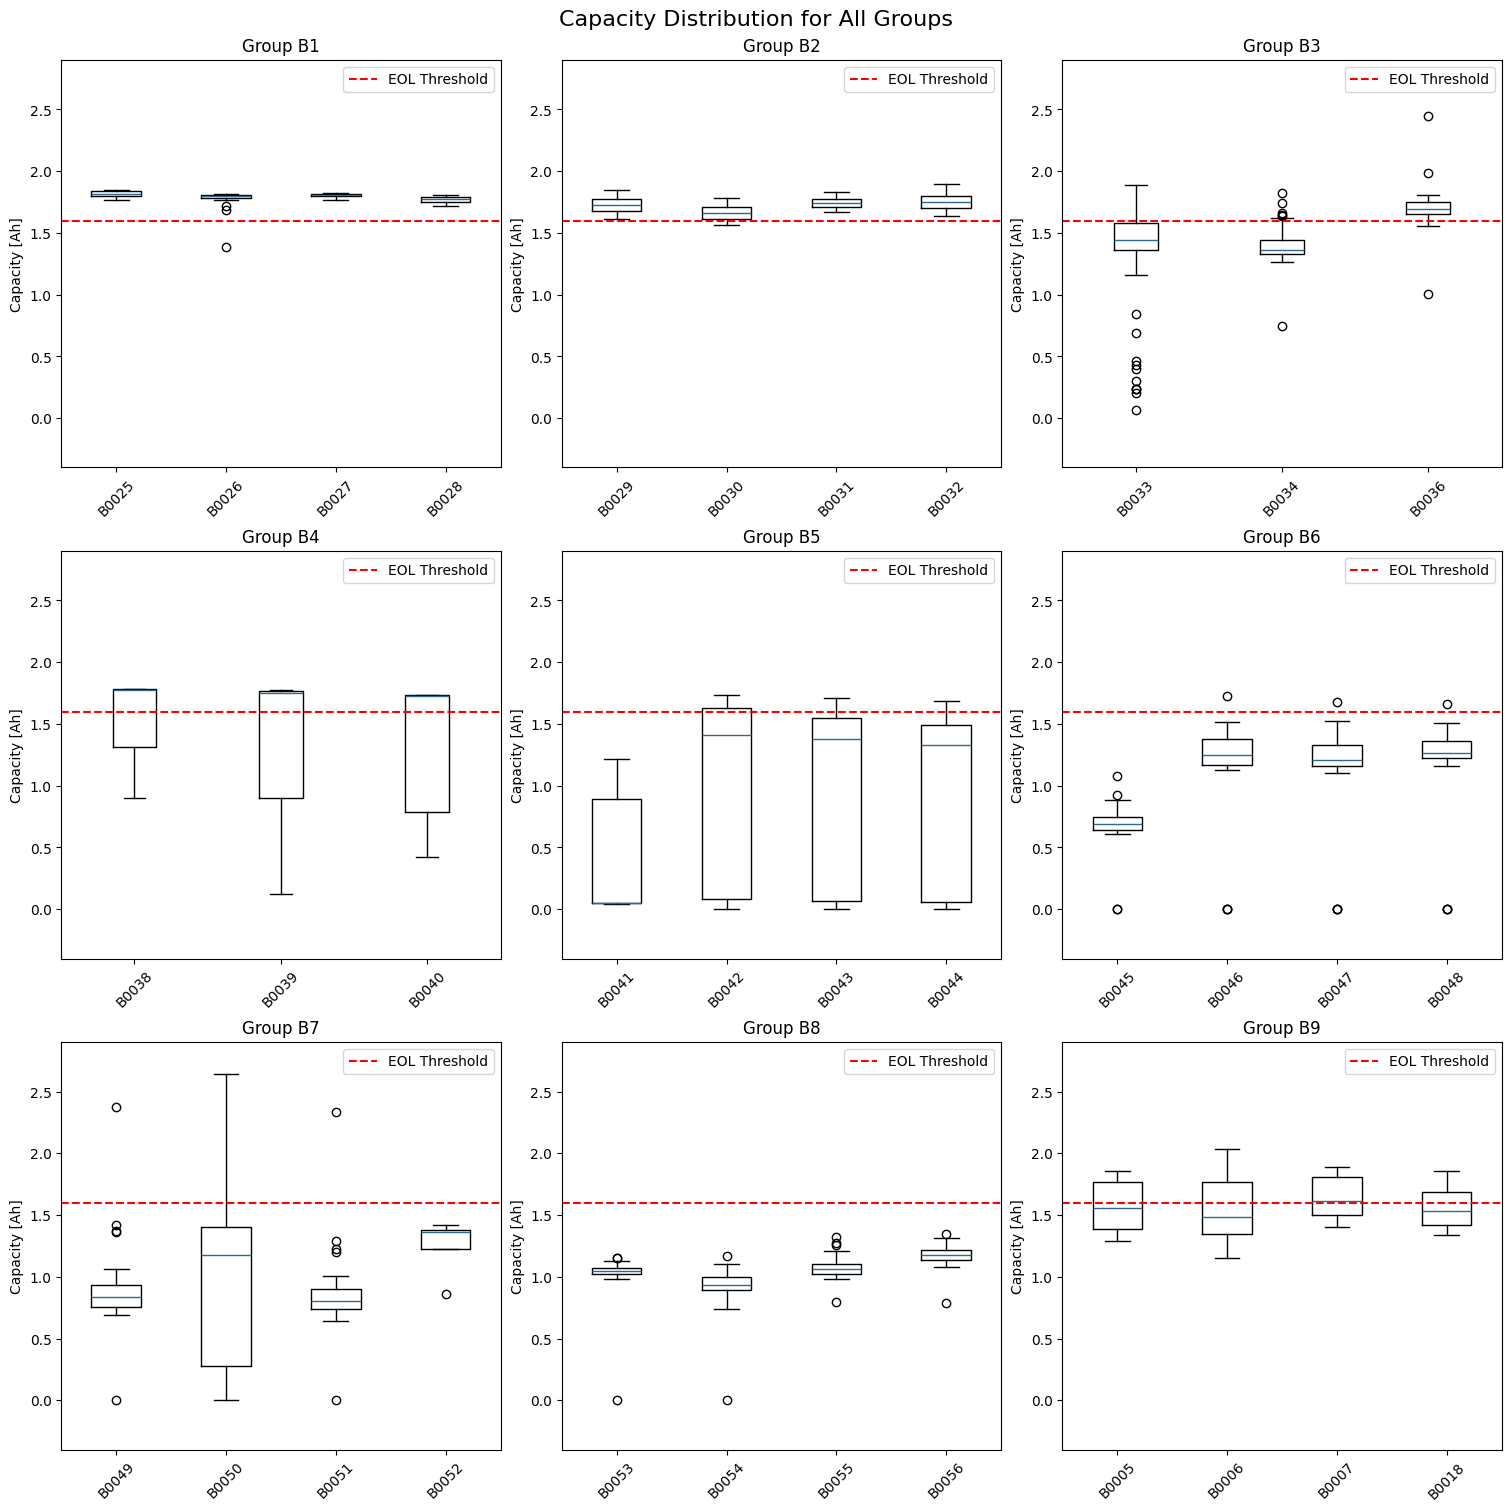

In [144]:
all_groups_capacity_distribution(grouping, dt)


In [145]:
def capacity_vs_cycle(cells: dict, dt: pd.DataFrame, eol_threshold=1.6):
    
    num_groups = len(cells)
    # Calculate rows for a 3-column layout
    nrows = (num_groups + 2) // 3  
    # Set up the figure and axes
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 4))
    # Flatten to easily iterate over axes
    axes = axes.flatten()  
    
    # Iterate over groups and plot in each subplot
    for idx, (group, batteries) in enumerate(cells.items()):
        ax = axes[idx]
        for cell in batteries:
            # Filter data for the specific battery and type "discharge"
            data = dt[(dt["battery_id"] == cell) & (dt["type"] == "discharge")].copy()
            if data.empty:
                print(f"No data available for battery: {cell}")
                continue
            
            # Ensure Capacity is float and create cycle numbers
            data["Capacity"] = data["Capacity"].astype(float)
            data["cycle"] = range(1, len(data) + 1)  # Cycles start from 1
            
            # Plot capacity vs. cycle for the current cell
            ax.plot(data["cycle"], data["Capacity"], marker='.', label=f"Battery {cell}")
        
        # Add horizontal line for EOL threshold
        ax.axhline(eol_threshold, color='k', linestyle='--', label='EOL Threshold')
        
        # Customize subplot
        ax.set_ylim(0, 2.5)
        ax.set_xlim(0, 200)
        ax.set_title(f"Group {group}")
        ax.set_xlabel("Cycle Number")
        ax.set_ylabel("Capacity [Ah]")
        ax.grid(alpha=0.5)
        ax.legend(fontsize="small", loc="upper right")
    
    # Hide any unused subplots
    for idx in range(len(cells), len(axes)):
        axes[idx].axis("off")
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


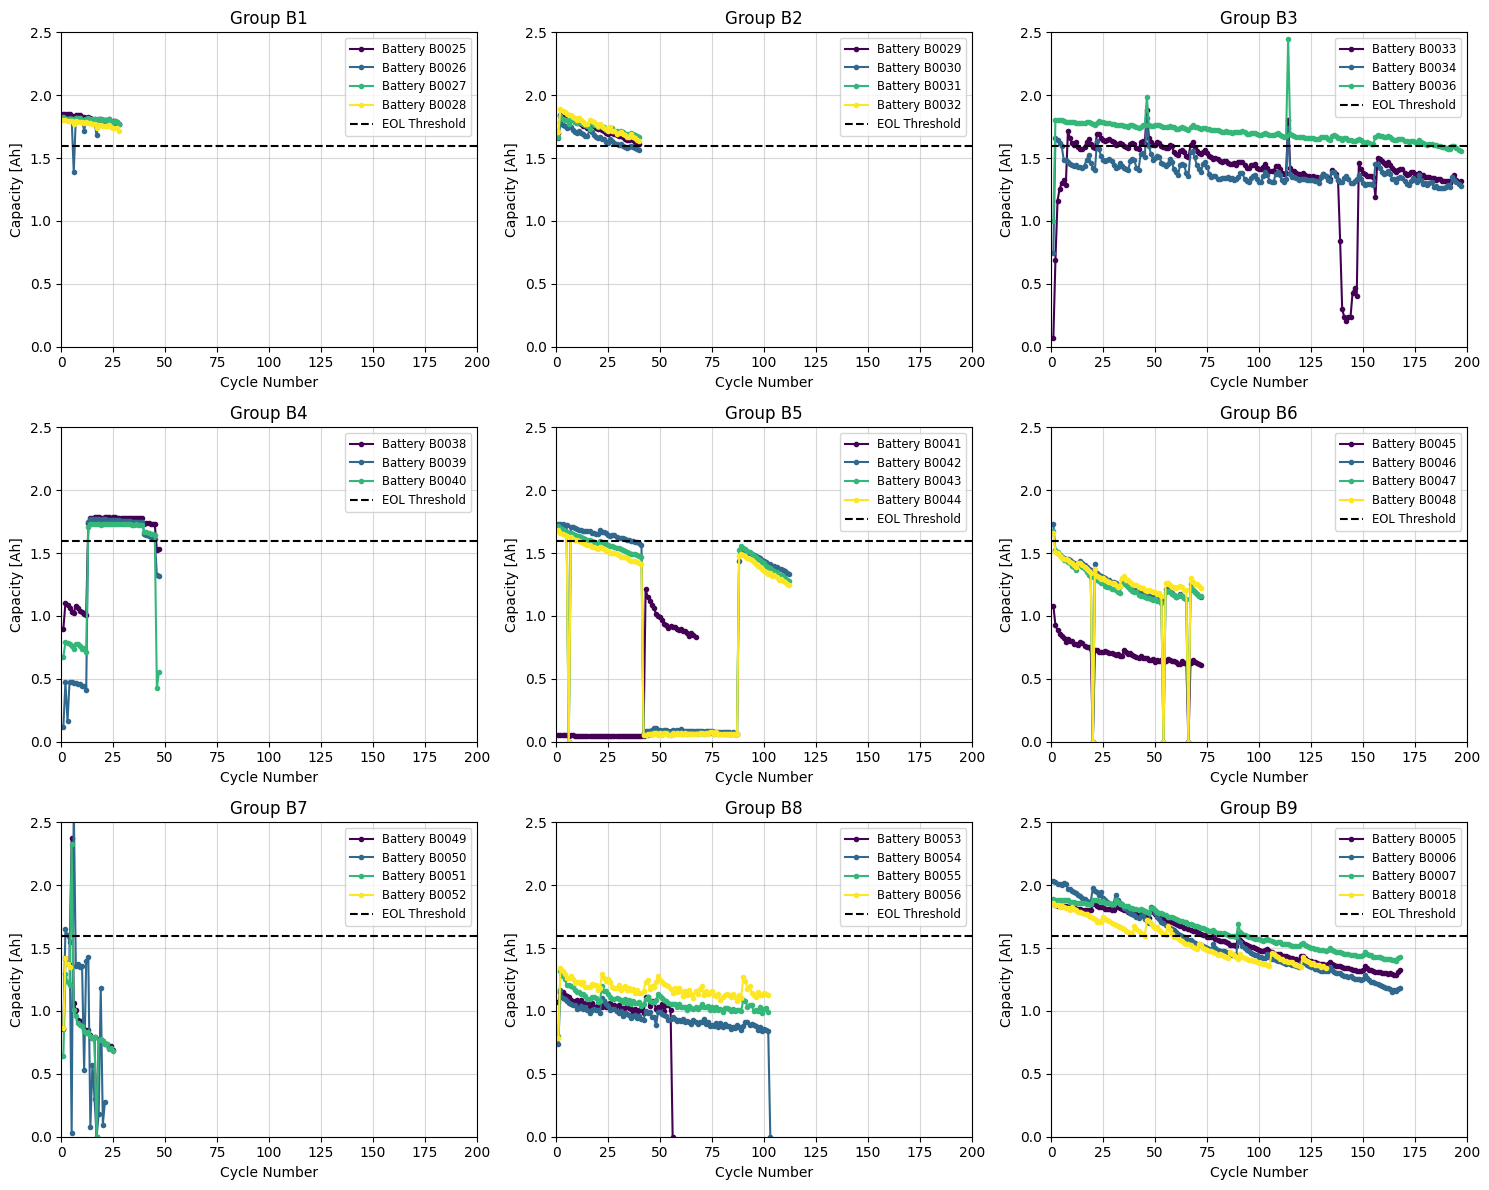

In [146]:
capacity_vs_cycle(cells=grouping, dt=dt, eol_threshold=1.6)
#eol_threshold is 70% of max of capacity -- because End of life is calculated through capacity of the battery

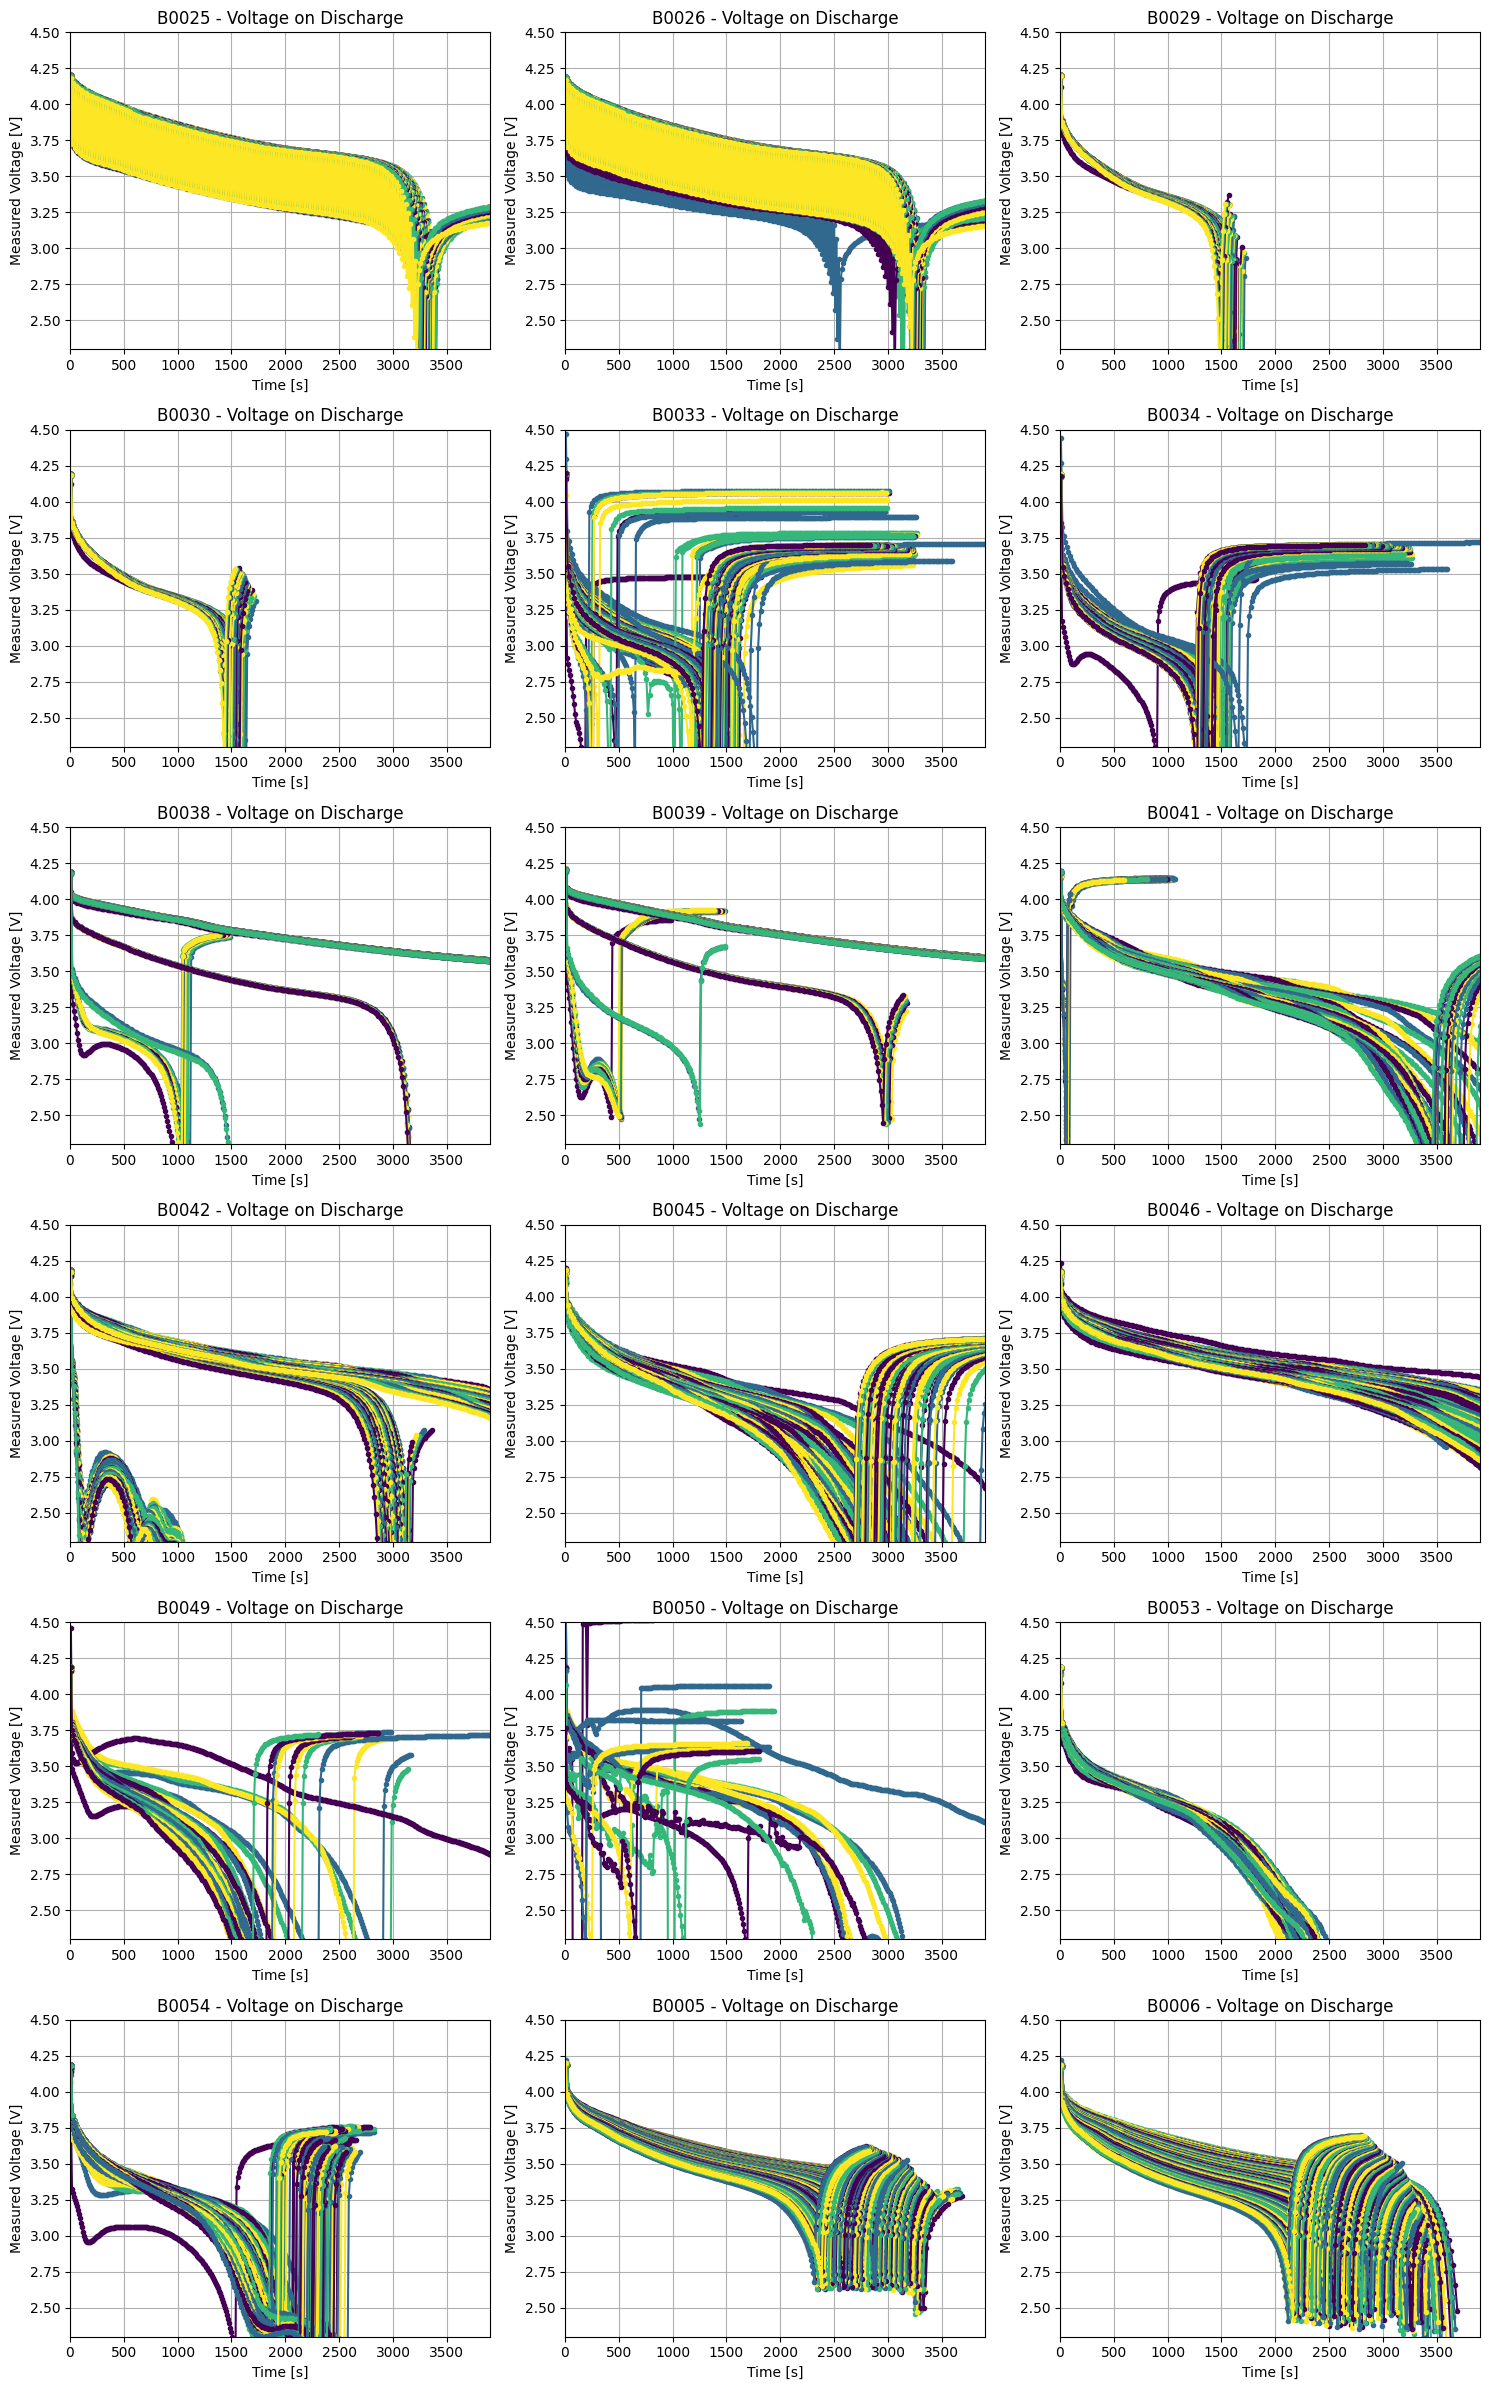

In [147]:
def voltage_vs_time_discharge(cells: dict, dt: pd.DataFrame, max_batteries=2):
    # Calculate the number of subplots needed (1 row per group, with 3 columns)
    num_groups = len(cells)
    # Calculate rows for a 3-column layout
    nrows = (max_batteries + 18) // 3  
    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 4))
    # Flatten axes array to easily index into them
    axes = axes.flatten()  
    
    # Initialize cycle count
    cycle = 1
    idx = 0  
    
    # Iterate over each group
    for group, batteries in cells.items():
        # Limit the number of batteries to max_batteries (default is 6)
        batteries_to_plot = batteries[:max_batteries]
        
        # Iterate over each battery in the limited set of batteries
        for battery_id in batteries_to_plot:
            ax = axes[idx]
            # Get the discharge cycle filenames for the specific battery
            filenames = dt[(dt["battery_id"] == battery_id) & (dt["type"] == "discharge")]['filename'].tolist()
            
            if not filenames:
                print(f"No discharge data found for battery: {battery_id}")
                continue

            # Plot voltage vs time for each cycle of the battery
            for filename in filenames:
                # Load battery data from CSV file
                battery_data = pd.read_csv(f"C:/Users/viswa/OneDrive/Desktop/assesment_thinkclock/cleaned_dataset/data/{filename}")
                
                # Plot the voltage data against time for the current cycle
                ax.plot(battery_data["Time"], battery_data["Voltage_measured"], marker='.', label=f"Cycle {cycle}")
                cycle += 1  # Increment cycle number

            # Customize the subplot
            ax.set_ylim(2.3, 4.5)  
            ax.set_xlim(0, 3900)  
            ax.set_xlabel("Time [s]")
            ax.set_ylabel("Measured Voltage [V]")
            ax.set_title(f"{battery_id} - Voltage on Discharge")
            ax.grid(True)            
            idx += 1  

    # Hide any unused subplots (if the number of batteries is less than max_batteries)
    for i in range(idx, len(axes)):
        axes[i].axis("off")
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your cell groups and metadata dataframe
voltage_vs_time_discharge(cells=grouping, dt=dt, max_batteries=2)


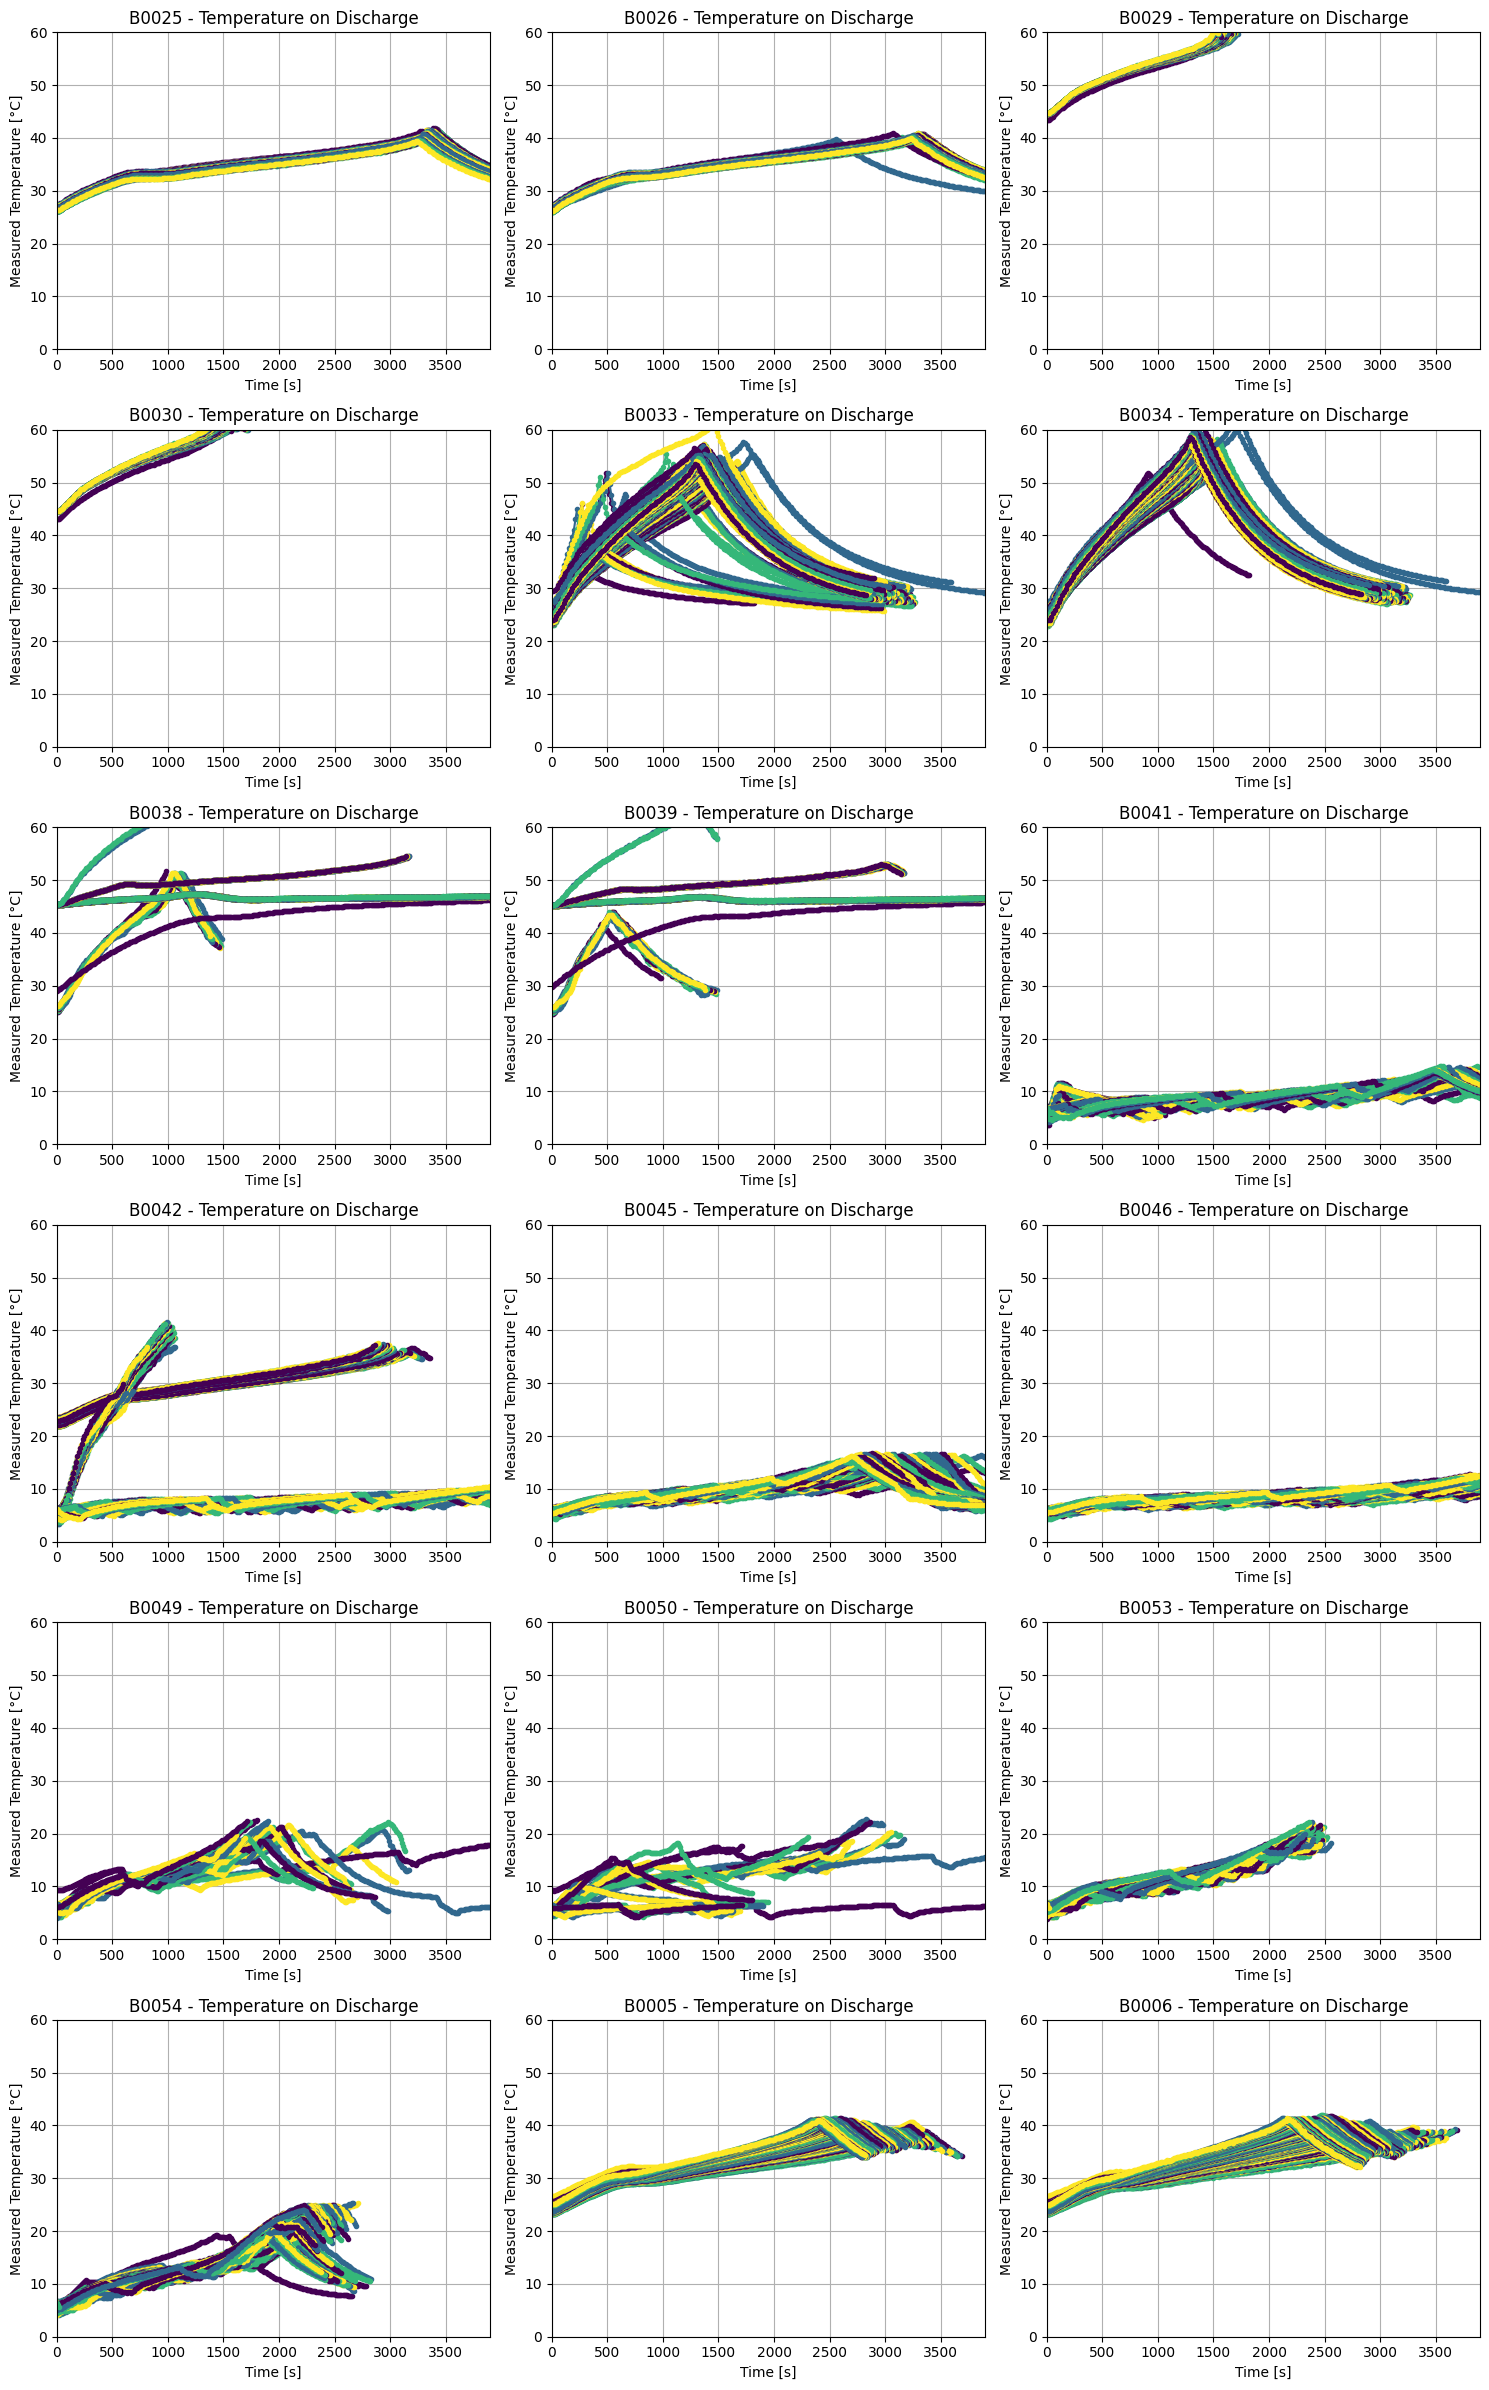

In [148]:
def temperature_vs_time_discharge(cells: dict, dt: pd.DataFrame, max_batteries=2):
    # Calculate the number of subplots needed (1 row per group, with 3 columns)
    num_groups = len(cells)
    nrows = (max_batteries + 18) // 3  # Calculate rows for a 3-column layout
    
    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 4))
    axes = axes.flatten()  # Flatten axes array to easily index into them
    
    cycle = 1
    idx = 0  # Index to track subplot position
    
    # Iterate over each group
    for group, batteries in cells.items():
        # Limit the number of batteries to max_batteries (default is 6)
        batteries_to_plot = batteries[:max_batteries]
        
        # Iterate over each battery in the limited set of batteries
        for battery_id in batteries_to_plot:
            ax = axes[idx]
            # Get the discharge cycle filenames for the specific battery
            filenames = dt[(dt["battery_id"] == battery_id) & (dt["type"] == "discharge")]['filename'].tolist()
            
            if not filenames:
                print(f"No discharge data found for battery: {battery_id}")
                continue

            # Plot temperature vs time for each cycle of the battery
            for filename in filenames:
                # Load battery data from CSV file
                battery_data = pd.read_csv(f"C:/Users/viswa/OneDrive/Desktop/assesment_thinkclock/cleaned_dataset/data/{filename}")
                
                # Plot the temperature data against time for the current cycle
                ax.plot(battery_data["Time"], battery_data["Temperature_measured"], marker='.', label=f"Cycle {cycle}")
                cycle += 1  

            # Customize the subplot
            ax.set_ylim(0, 60)  
            ax.set_xlim(0, 3900) 
            ax.set_xlabel("Time [s]")
            ax.set_ylabel("Measured Temperature [°C]")
            ax.set_title(f"{battery_id} - Temperature on Discharge")
            ax.grid(True)
            idx += 1  

    # Hide any unused subplots (if the number of batteries is less than max_batteries)
    for i in range(idx, len(axes)):
        axes[i].axis("off")
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your cell groups and metadata dataframe
temperature_vs_time_discharge(cells=grouping, dt=dt, max_batteries=2)


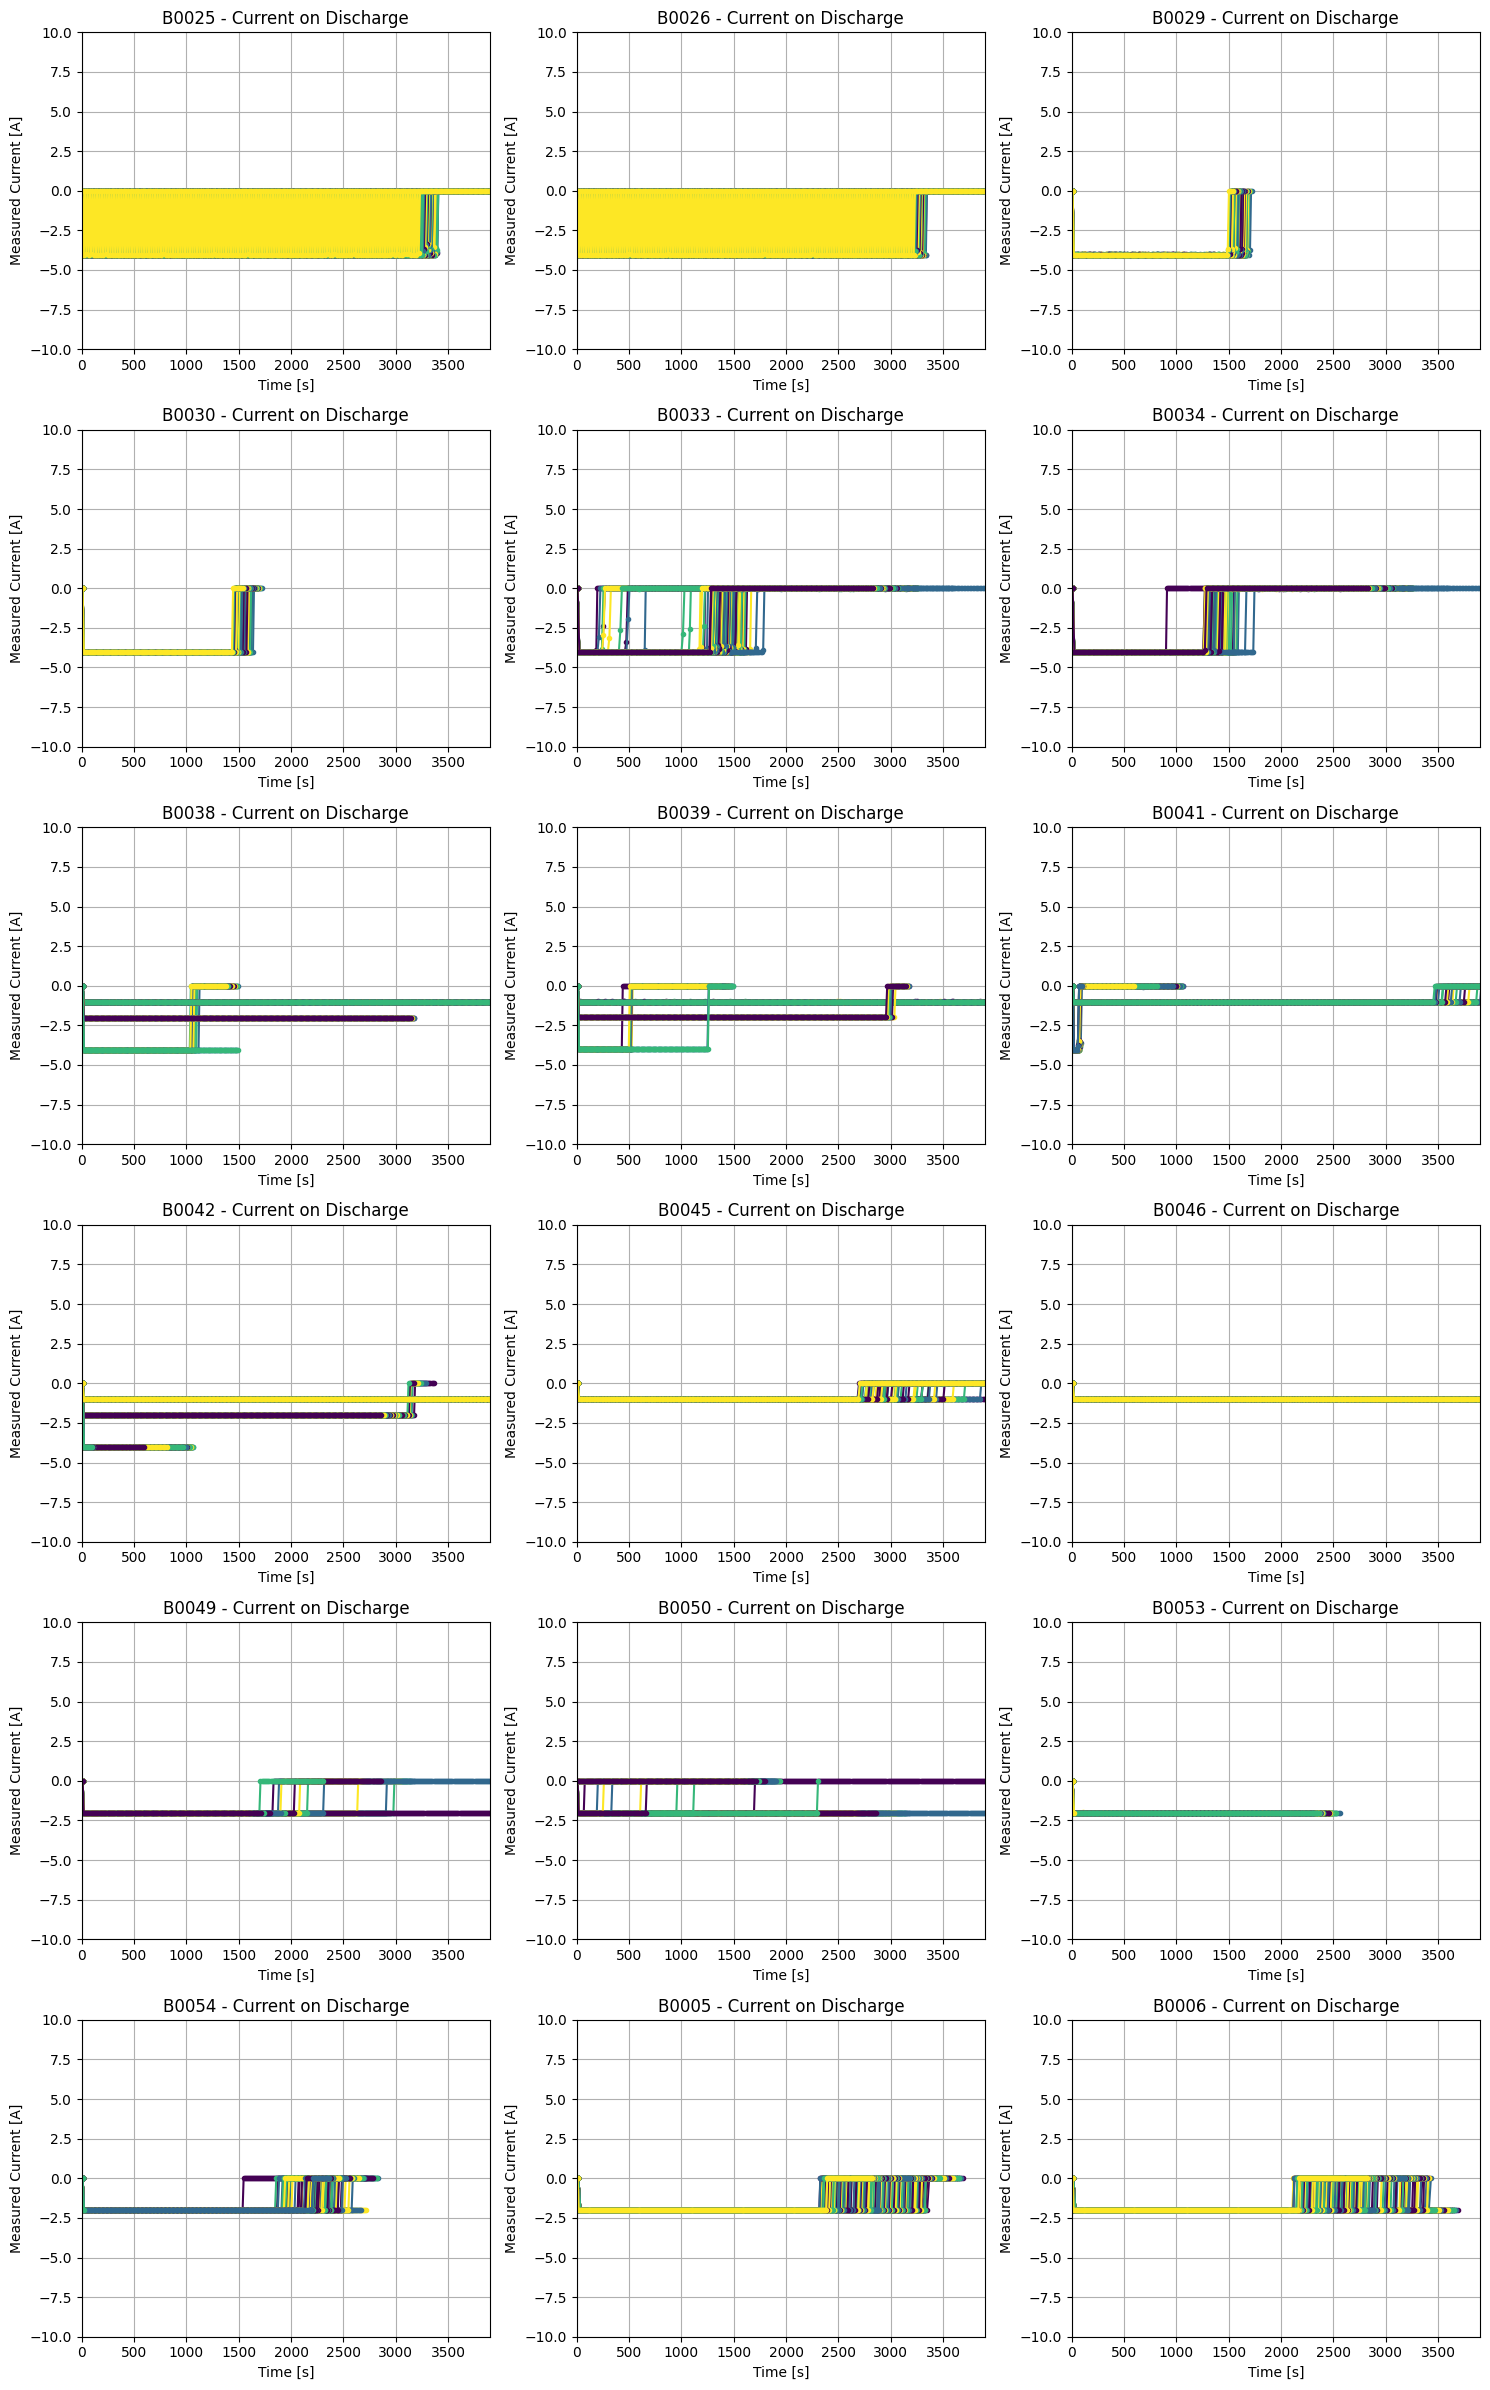

In [149]:
def current_vs_time_discharge(cells: dict, dt: pd.DataFrame, max_batteries=2):
    # Calculate the number of subplots needed (1 row per group, with 3 columns)
    num_groups = len(cells)
    # Calculate rows for a 3-column layout
    nrows = (max_batteries + 18) // 3  
    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 4))
    # Flatten axes array to easily index into them
    axes = axes.flatten()  
    
    cycle = 1
    idx = 0 
    # Iterate over each group
    for group, batteries in cells.items():
        # Limit the number of batteries to max_batteries (default is 6)
        batteries_to_plot = batteries[:max_batteries]
        
        # Iterate over each battery in the limited set of batteries
        for battery_id in batteries_to_plot:
            ax = axes[idx]
            # Get the discharge cycle filenames for the specific battery
            filenames = dt[(dt["battery_id"] == battery_id) & (dt["type"] == "discharge")]['filename'].tolist()
            
            if not filenames:
                print(f"No discharge data found for battery: {battery_id}")
                continue

            # Plot current vs time for each cycle of the battery
            for filename in filenames:
                # Load battery data from CSV file
                battery_data = pd.read_csv(f"C:/Users/viswa/OneDrive/Desktop/assesment_thinkclock/cleaned_dataset/data/{filename}")
                
                # Plot the current data against time for the current cycle
                ax.plot(battery_data["Time"], battery_data["Current_measured"], marker='.', label=f"Cycle {cycle}")
                cycle += 1  

            # Customize the subplot
            ax.set_ylim(-10, 10)  
            ax.set_xlim(0, 3900) 
            ax.set_xlabel("Time [s]")
            ax.set_ylabel("Measured Current [A]")
            ax.set_title(f"{battery_id} - Current on Discharge")
            ax.grid(True)
            idx += 1  

    # Hide any unused subplots (if the number of batteries is less than max_batteries)
    for i in range(idx, len(axes)):
        axes[i].axis("off")
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your cell groups and metadata dataframe
current_vs_time_discharge(cells=grouping, dt=dt, max_batteries=2)


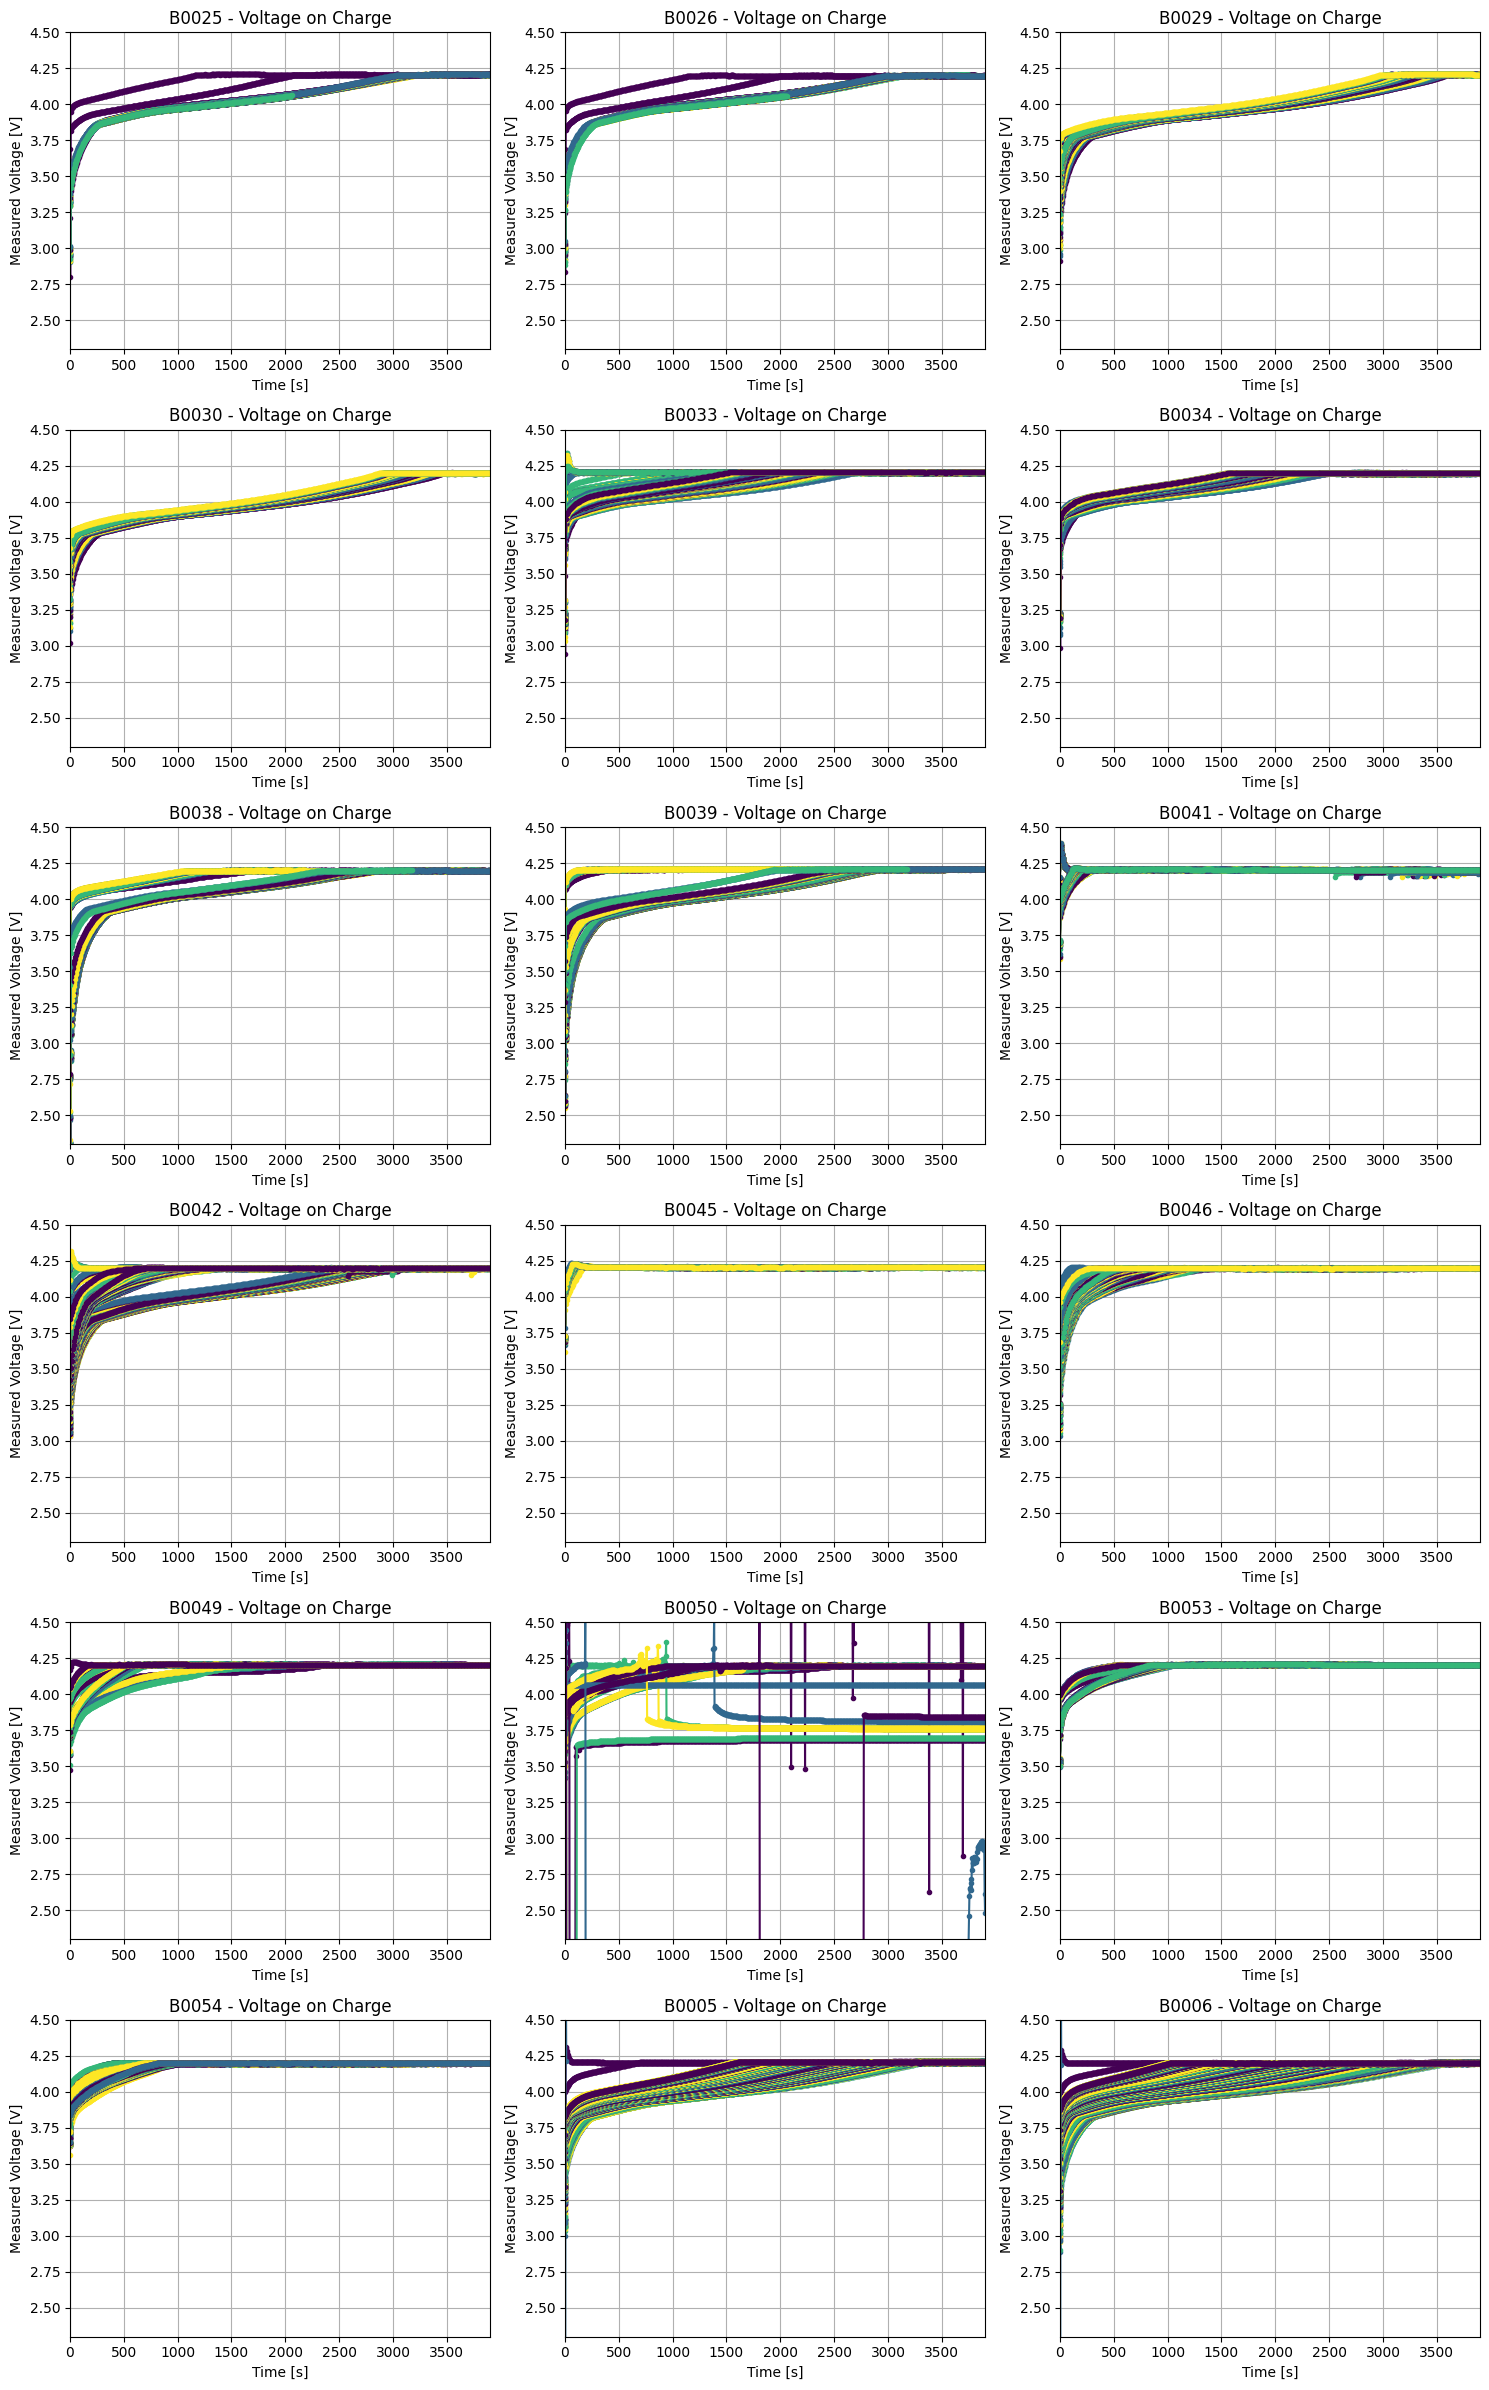

In [150]:
def voltage_vs_time_charge(cells: dict, dt: pd.DataFrame, max_batteries=2):
    # Calculate the number of subplots needed (1 row per group, with 3 columns)
    num_groups = len(cells)
     # Calculate rows for a 3-column layout
    nrows = (max_batteries + 18) // 3 
    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 4))
    # Flatten axes array to easily index into them
    axes = axes.flatten()  
    
    cycle = 1
    idx = 0  
    
    # Iterate over each group
    for group, batteries in cells.items():
        # Limit the number of batteries to max_batteries (default is 6)
        batteries_to_plot = batteries[:max_batteries]
        
        # Iterate over each battery in the limited set of batteries
        for battery_id in batteries_to_plot:
            ax = axes[idx]
            # Get the charge cycle filenames for the specific battery
            filenames = dt[(dt["battery_id"] == battery_id) & (dt["type"] == "charge")]['filename'].tolist()
            
            if not filenames:
                print(f"No charge data found for battery: {battery_id}")
                continue

            # Plot voltage vs time for each cycle of the battery
            for filename in filenames:
                # Load battery data from CSV file
                battery_data = pd.read_csv(f"C:/Users/viswa/OneDrive/Desktop/assesment_thinkclock/cleaned_dataset/data/{filename}")
                
                # Plot the voltage data against time for the current cycle
                ax.plot(battery_data["Time"], battery_data["Voltage_measured"], marker='.', label=f"Cycle {cycle}")
                cycle += 1 

            # Customize the subplot
            ax.set_ylim(2.3, 4.5)  
            ax.set_xlim(0, 3900)   
            ax.set_xlabel("Time [s]")
            ax.set_ylabel("Measured Voltage [V]")
            ax.set_title(f"{battery_id} - Voltage on Charge")
            ax.grid(True)
            idx += 1  
    # Hide any unused subplots (if the number of batteries is less than max_batteries)
    for i in range(idx, len(axes)):
        axes[i].axis("off")
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your cell groups and metadata dataframe
voltage_vs_time_charge(cells=grouping, dt=dt, max_batteries=2)


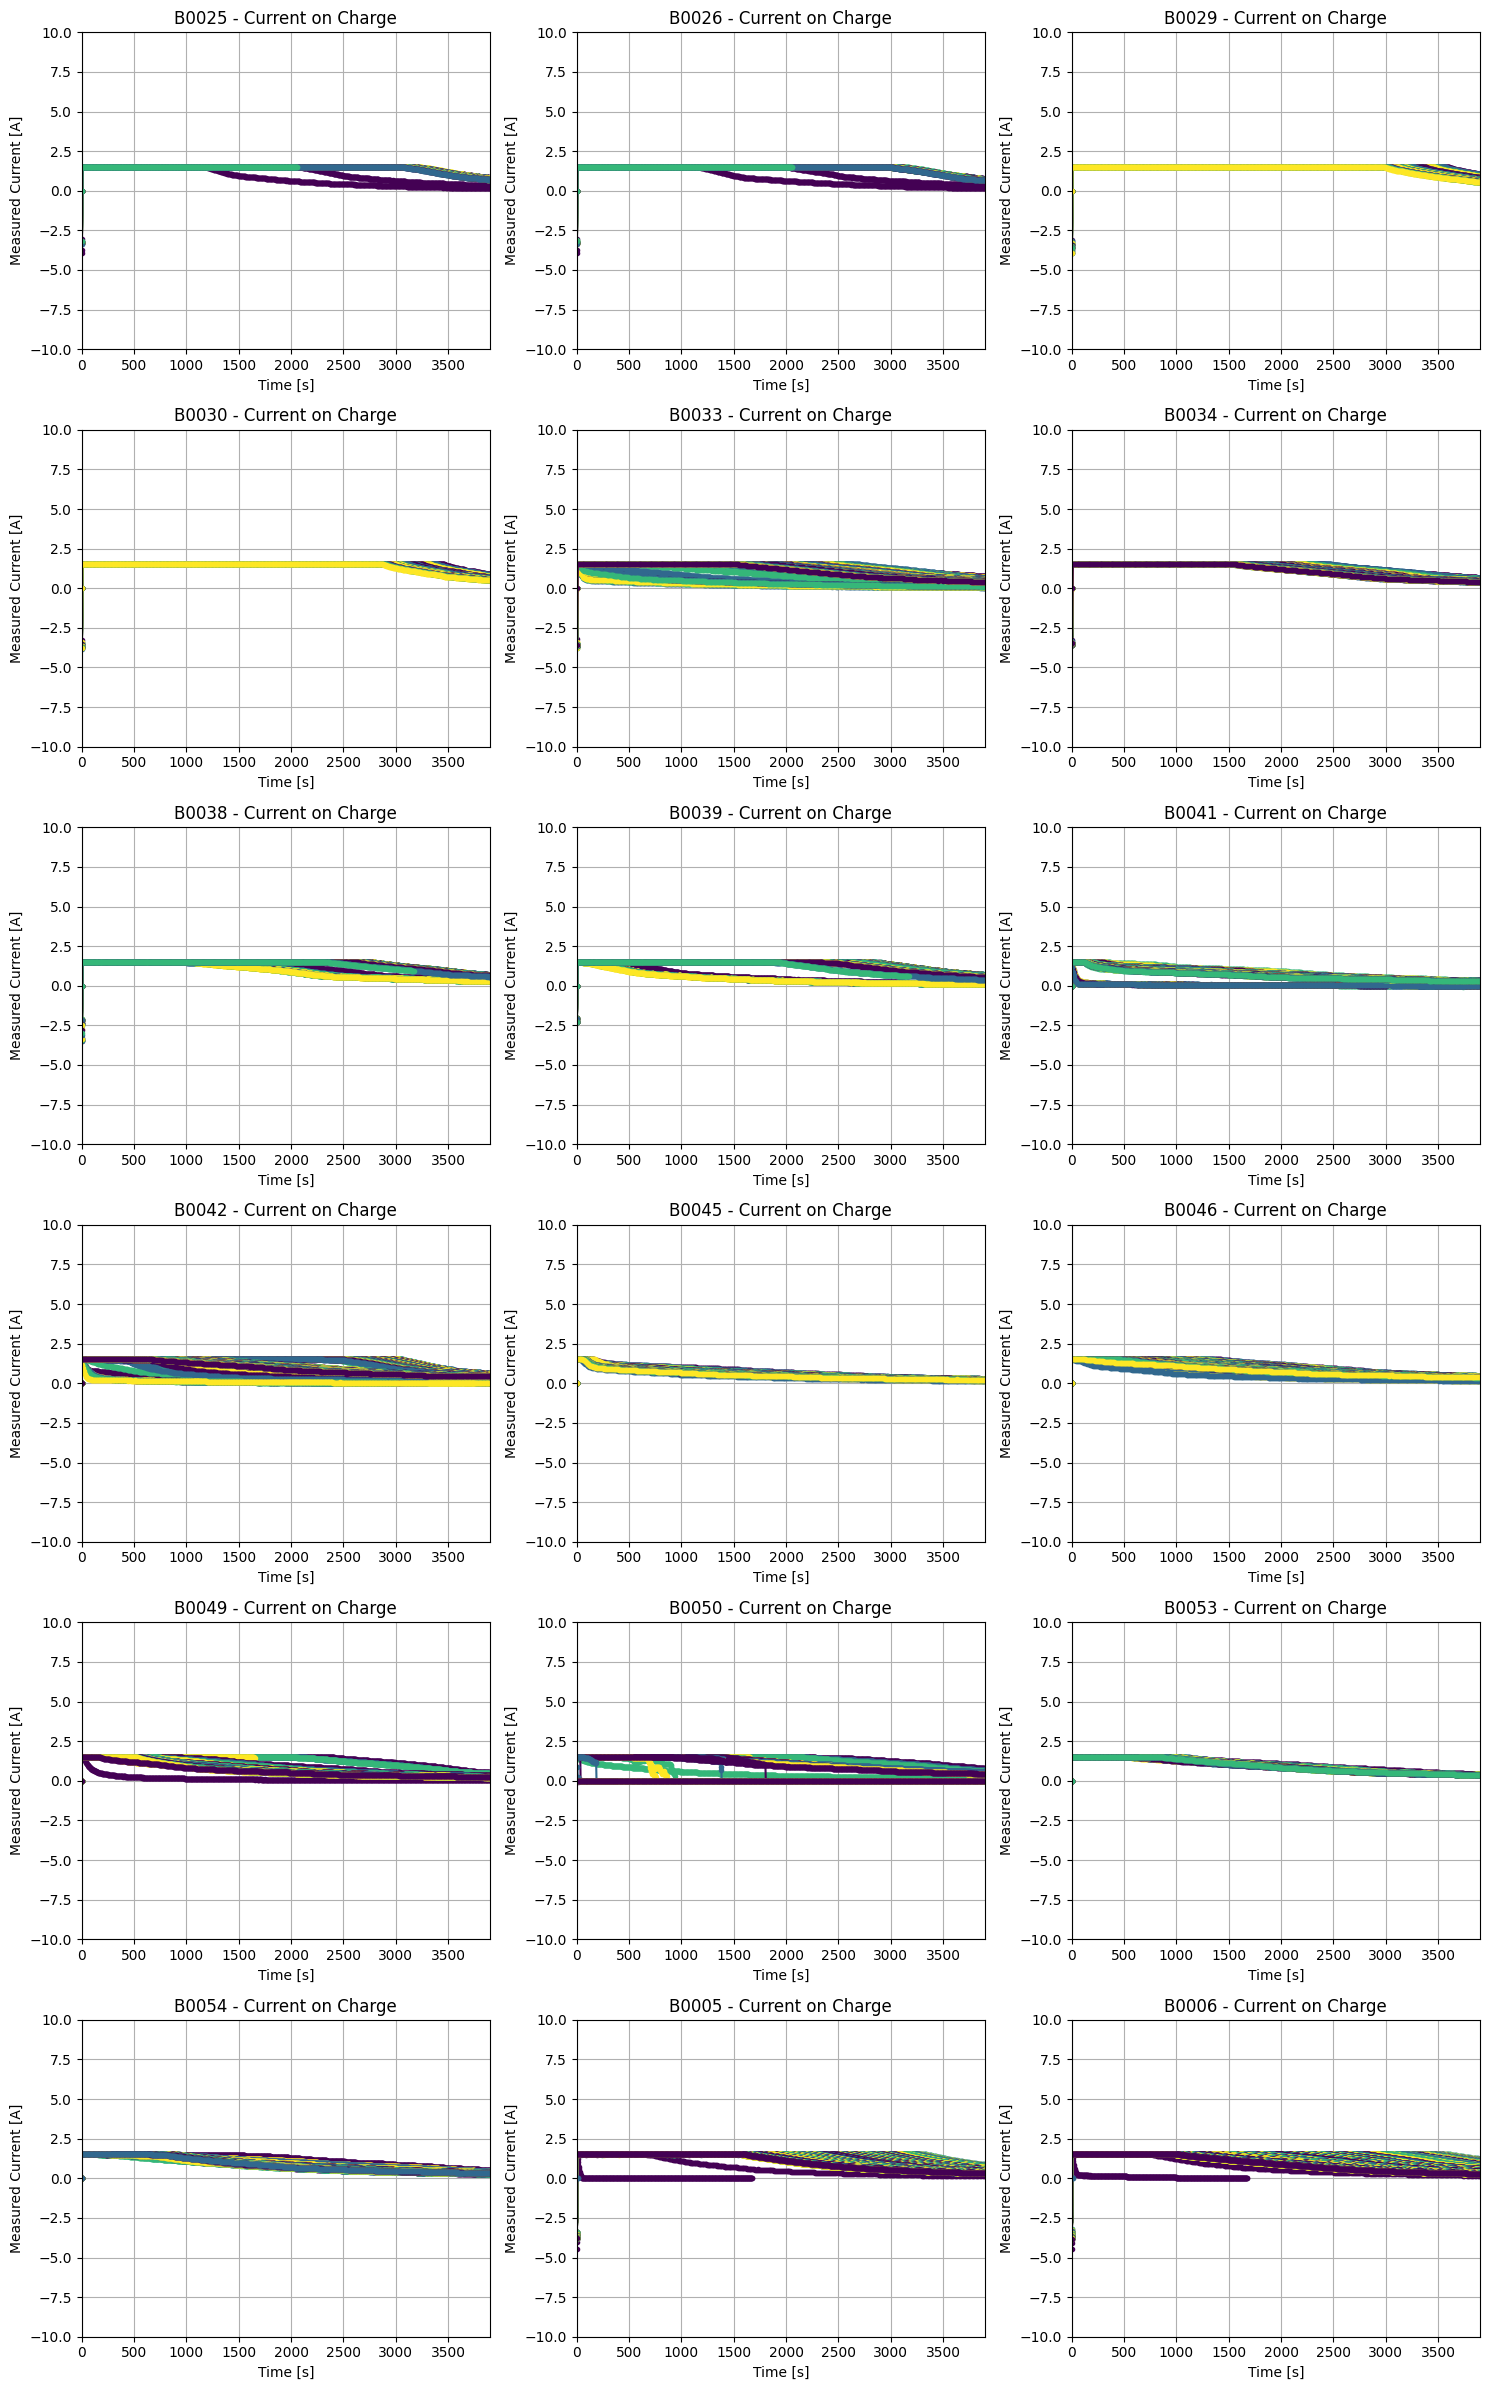

In [151]:
def current_vs_time_charge(cells: dict, dt: pd.DataFrame, max_batteries=2):
    # Calculate the number of subplots needed (1 row per group, with 3 columns)
    num_groups = len(cells)
    # Calculate rows for a 3-column layout
    nrows = (max_batteries + 18) // 3 
    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 4))
    # Flatten axes array to easily index into them
    axes = axes.flatten()  
    
    cycle = 1
    idx = 0  
    
    # Iterate over each group
    for group, batteries in cells.items():
        # Limit the number of batteries to max_batteries (default is 6)
        batteries_to_plot = batteries[:max_batteries]
        
        # Iterate over each battery in the limited set of batteries
        for battery_id in batteries_to_plot:
            ax = axes[idx]
            # Get the charge cycle filenames for the specific battery
            filenames = dt[(dt["battery_id"] == battery_id) & (dt["type"] == "charge")]['filename'].tolist()
            
            if not filenames:
                print(f"No charge data found for battery: {battery_id}")
                continue

            # Plot current vs time for each cycle of the battery
            for filename in filenames:
                # Load battery data from CSV file
                battery_data = pd.read_csv(f"C:/Users/viswa/OneDrive/Desktop/assesment_thinkclock/cleaned_dataset/data/{filename}")
                
                # Plot the current data against time for the current cycle
                ax.plot(battery_data["Time"], battery_data["Current_measured"], marker='.', label=f"Cycle {cycle}")
                cycle += 1  

            # Customize the subplot
            ax.set_ylim(-10, 10) 
            ax.set_xlim(0, 3900) 
            ax.set_xlabel("Time [s]")
            ax.set_ylabel("Measured Current [A]")
            ax.set_title(f"{battery_id} - Current on Charge")
            ax.grid(True)
            idx += 1 
    # Hide any unused subplots (if the number of batteries is less than max_batteries)
    for i in range(idx, len(axes)):
        axes[i].axis("off")
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your cell groups and metadata dataframe
current_vs_time_charge(cells=grouping, dt=dt, max_batteries=2)


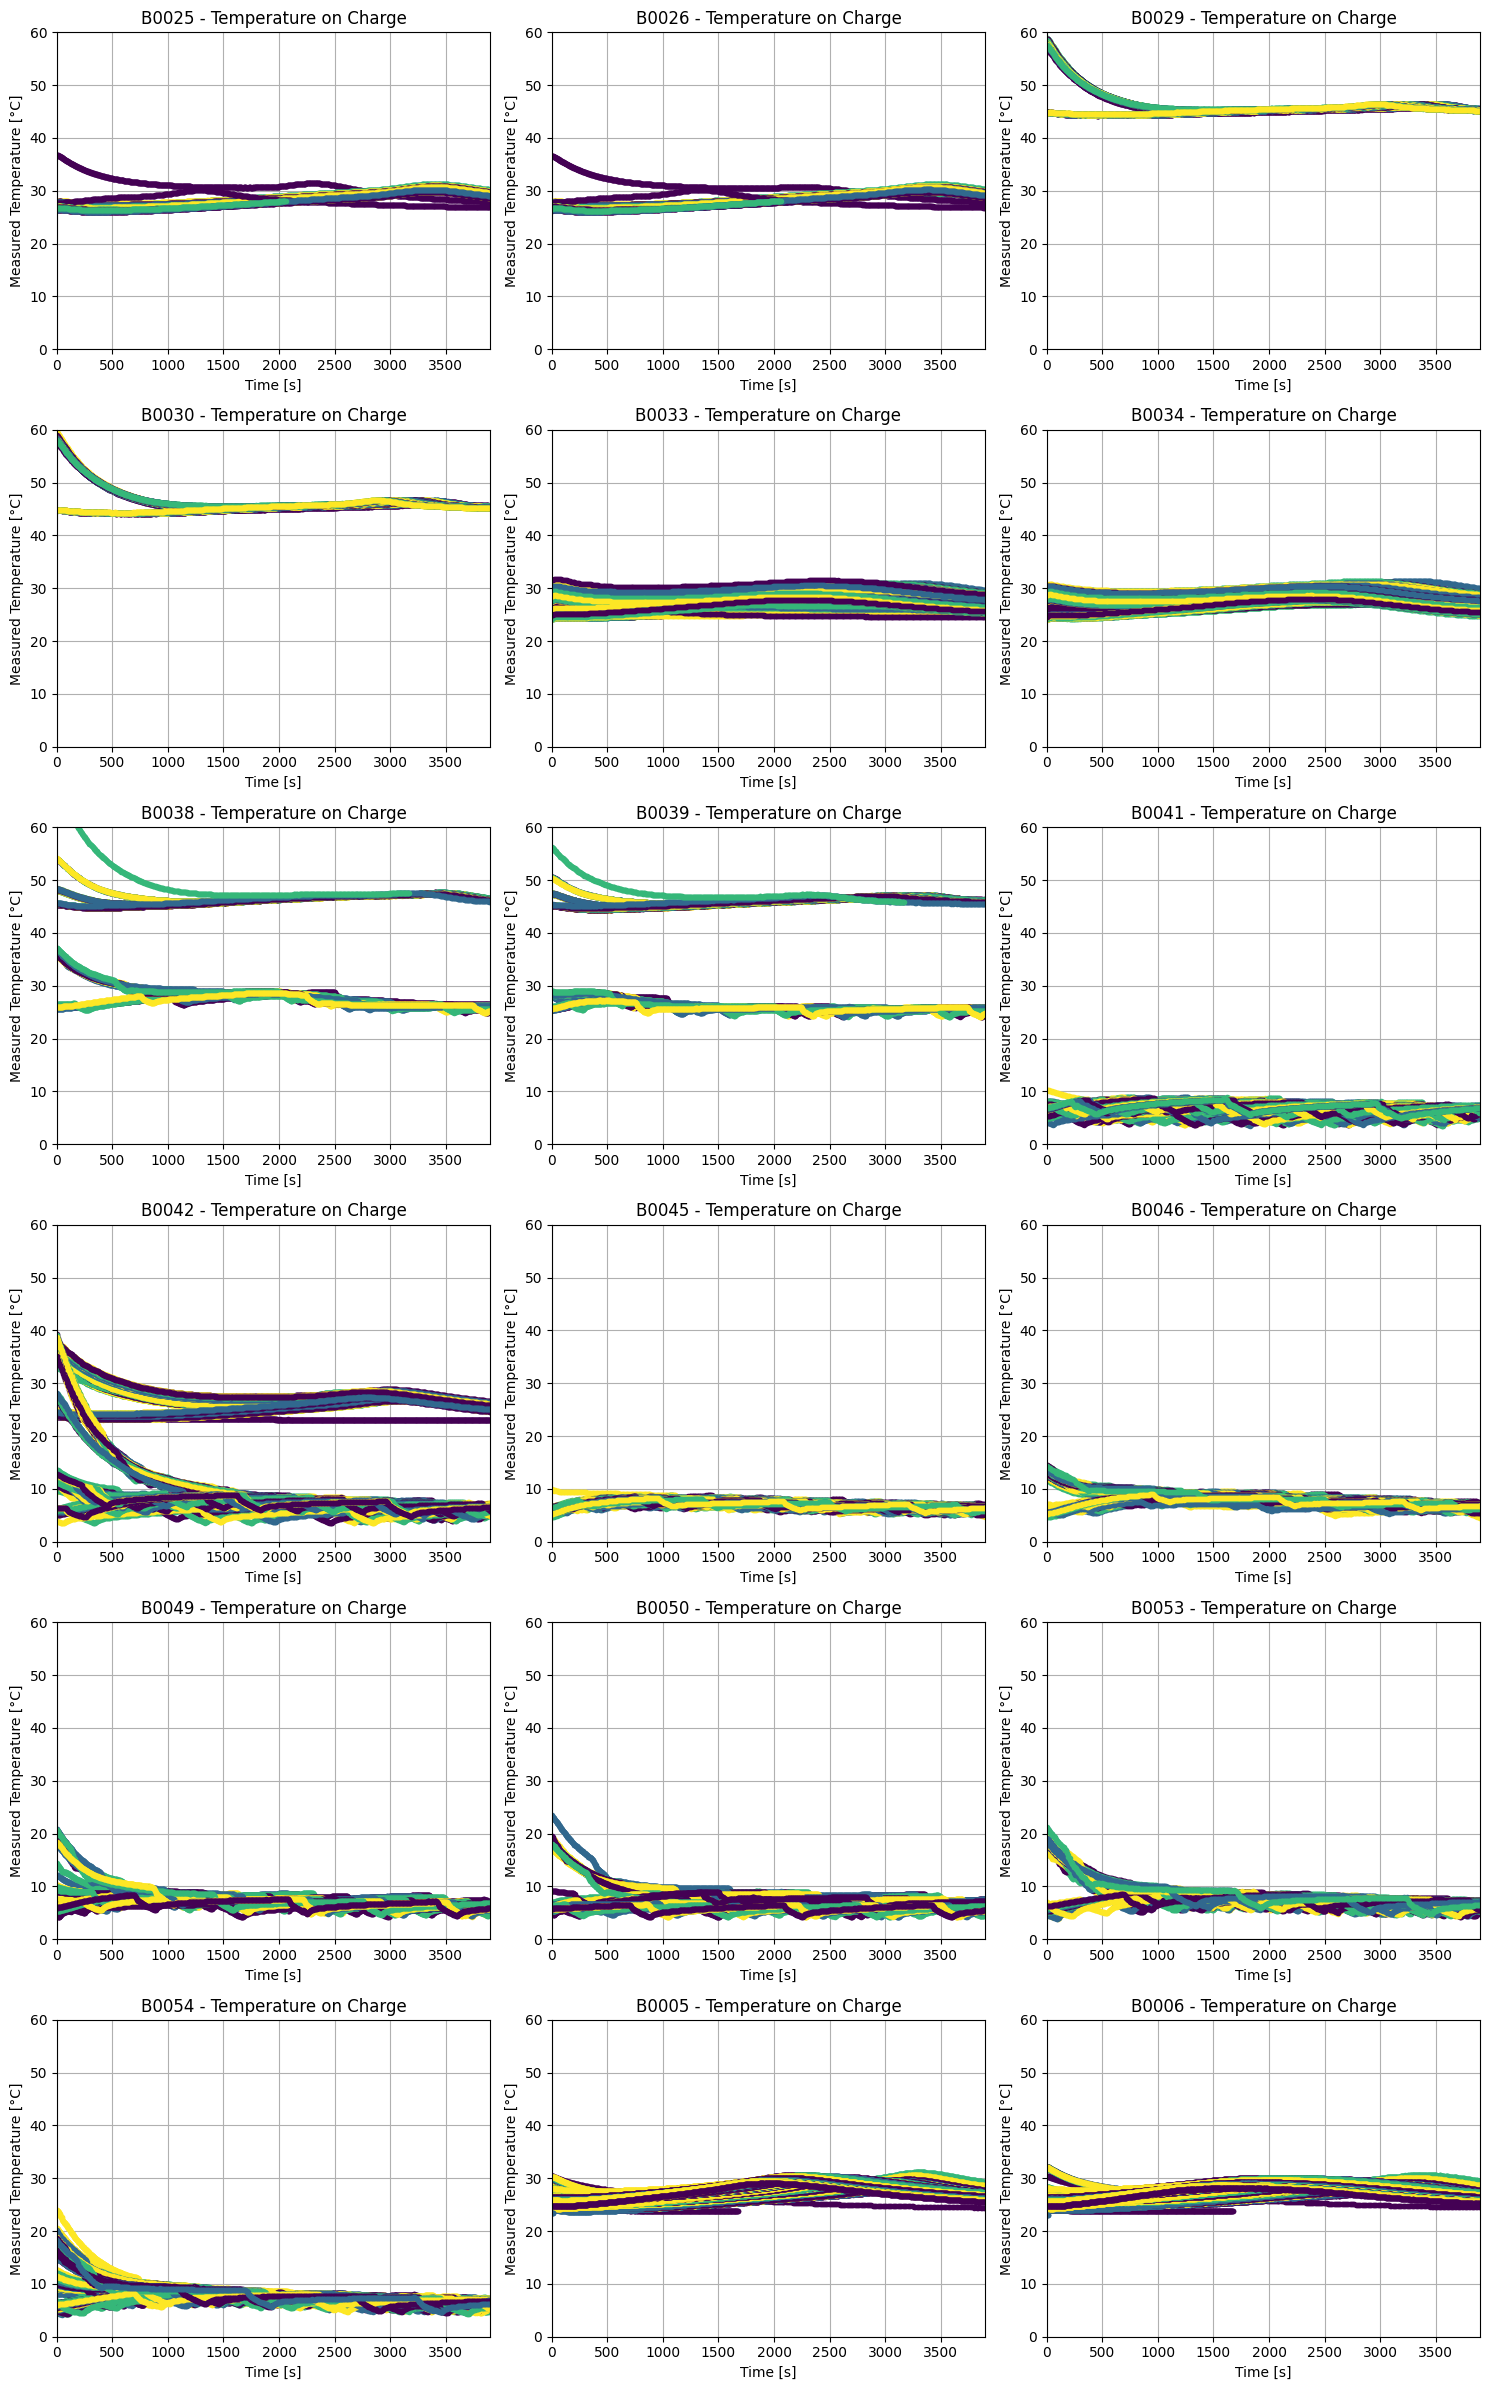

In [152]:
def temperature_vs_time_charge(cells: dict, dt: pd.DataFrame, max_batteries=2):
    # Calculate the number of subplots needed (1 row per group, with 3 columns)
    num_groups = len(cells)
    # Calculate rows for a 3-column layout
    nrows = (max_batteries + 18) // 3  
    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 4))
    # Flatten axes array to easily index into them
    axes = axes.flatten()  
    cycle = 1
    idx = 0  
    
    # Iterate over each group
    for group, batteries in cells.items():
        # Limit the number of batteries to max_batteries (default is 6)
        batteries_to_plot = batteries[:max_batteries]
        
        # Iterate over each battery in the limited set of batteries
        for battery_id in batteries_to_plot:
            ax = axes[idx]
            # Get the charge cycle filenames for the specific battery
            filenames = dt[(dt["battery_id"] == battery_id) & (dt["type"] == "charge")]['filename'].tolist()
            
            if not filenames:
                print(f"No charge data found for battery: {battery_id}")
                continue

            # Plot temperature vs time for each cycle of the battery
            for filename in filenames:
                # Load battery data from CSV file
                battery_data = pd.read_csv(f"C:/Users/viswa/OneDrive/Desktop/assesment_thinkclock/cleaned_dataset/data/{filename}")
                
                # Plot the temperature data against time for the current cycle
                ax.plot(battery_data["Time"], battery_data["Temperature_measured"], marker='.', label=f"Cycle {cycle}")
                cycle += 1  

            # Customize the subplot
            ax.set_ylim(0, 60)  
            ax.set_xlim(0, 3900)  
            ax.set_xlabel("Time [s]")
            ax.set_ylabel("Measured Temperature [°C]")
            ax.set_title(f"{battery_id} - Temperature on Charge")
            ax.grid(True)
            idx += 1 

    # Hide any unused subplots (if the number of batteries is less than max_batteries)
    for i in range(idx, len(axes)):
        axes[i].axis("off")
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your cell groups and metadata dataframe
temperature_vs_time_charge(cells=grouping, dt=dt, max_batteries=2)


The above code completes the question according to my understanding hope the assessment satisfied the requirement 
contact me through:
Email: viswa482002@gmail.com
ph.no: 8442006972
Thank you for considering my appplication for this process.